**MOVIE RATING PREDICTION **

* Project Overview
* The Movie Rating Prediction project involves analyzing a dataset containing information about Indian movies. The dataset includes details like movie name, year, duration, genre, rating, votes, director, and three main actors. The data will be used to build a predictive model for movie ratings and extract valuable insights from the movie industry.


* Objectives
* Develop a predictive model: Create a machine learning model to predict movie ratings based on the provided dataset.
* This is essentially a regression problem, where we aim to estimate the numerical movie ratings based on various features.
* Identify influential factors: Analyze the dataset to determine which factors (e.g., genre, director, actors) have the most significant impact on movie ratings.
* Provide actionable insights: Offer insights to the film industry stakeholders to make informed decisions about movie production, casting, and marketing.



**TABLE OF CONTENT
**


* Importing Libraries and Loading data

* Data Information and Data Cleaning

* Data Visualisation



# Importing the Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error



In [3]:
from google.colab import drive
drive.mount("/content/drive/",force_remount=True)

path = "/content/drive/MyDrive/IMDb_movie_dataset.csv"

Mounted at /content/drive/


#Loading the Dataset

In [4]:
!pip install chardet
import chardet

with open(path, 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

df = pd.read_csv(path, encoding=encoding)


#Data Exploration

In [5]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
4,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [6]:
df.describe()


,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15508 entries, 0 to 15507
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15508 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13631 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14983 non-null  object 
 7   Actor 1   13891 non-null  object 
 8   Actor 2   13124 non-null  object 
 9   Actor 3   12364 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [8]:
df.shape

(15508, 10)

In [9]:
df.isnull().sum()

Name           0
Year         527
Duration    8268
Genre       1877
Rating      7589
Votes       7588
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

#Data PreProcessing

Handling Missing Values

In [10]:
df.dropna(inplace = True)

In [11]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [12]:
#Remove Commas And Convert Votes Into Interger
df["Votes"] = df["Votes"].str.replace(",", "",regex = True).astype(int)

In [13]:
df["Votes"].head()

0       8
2      35
4     827
5    1086
7     326
Name: Votes, dtype: int64

Removing Duplicates

In [14]:
df.drop_duplicates(inplace = True)

In [15]:
df.shape

(5659, 10)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 0 to 15507
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   float64
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 486.3+ KB


In [17]:
df.describe()

,Year,Rating,Votes
count,5659.000000,5659.000000,5659.000000
mean,-1996.247570,5.898533,2697.649585
std,19.741839,1.381165,13651.503584
min,-2021.000000,1.100000,5.000000
25%,-2013.000000,5.000000,30.000000
50%,-2002.000000,6.100000,131.000000
75%,-1983.000000,6.900000,922.500000
max,-1931.000000,10.000000,591417.000000


# Data Visualization

In [18]:
def TopTenPlot(column):
    global df
    df[column].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Top Ten {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

In [19]:

def Histogram(column):
    global df
    plt.figure(figsize=(20,6))
    plt.hist(df[column], edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Histogram of {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [20]:
def Scatter(x, y, c=None):
    global df
    plt.figure(figsize=(20,6))
    plt.scatter(df[x], df[y], edgecolor="k", c=c)
    plt.xticks(rotation=0)
    plt.title("Scatter plot X:{} / Y:{}".format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

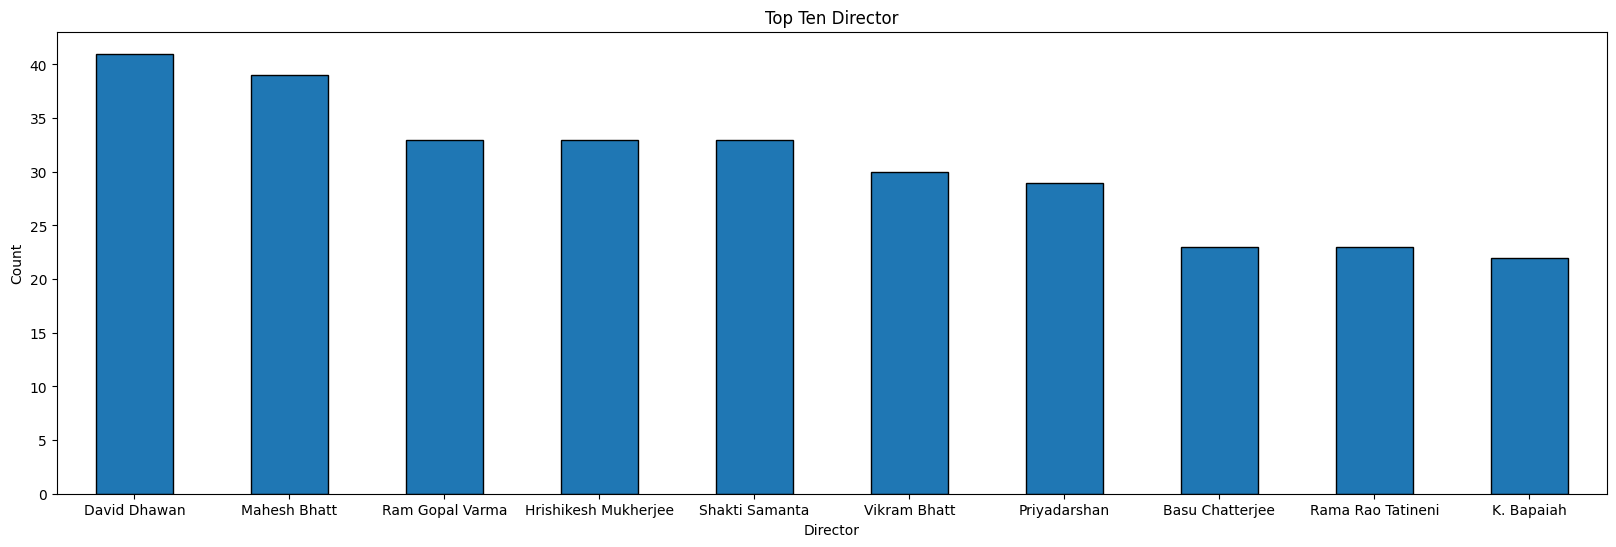

In [21]:
TopTenPlot("Director")

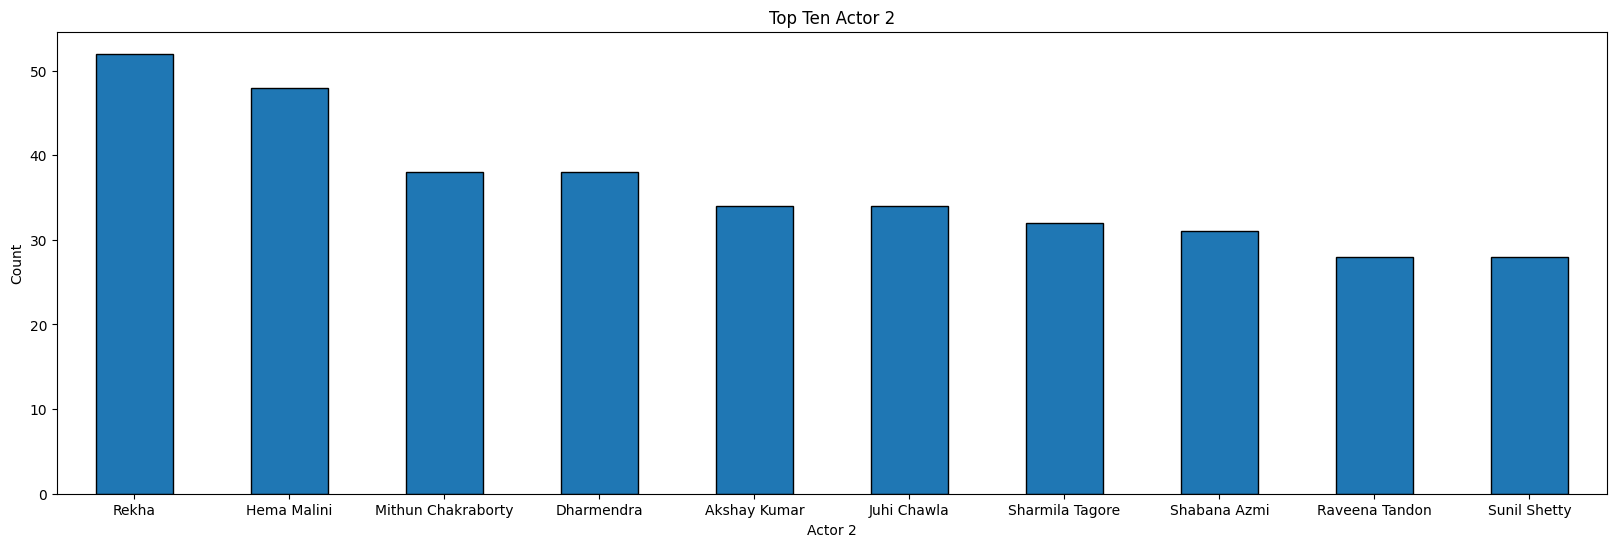

In [22]:
TopTenPlot("Actor 2")

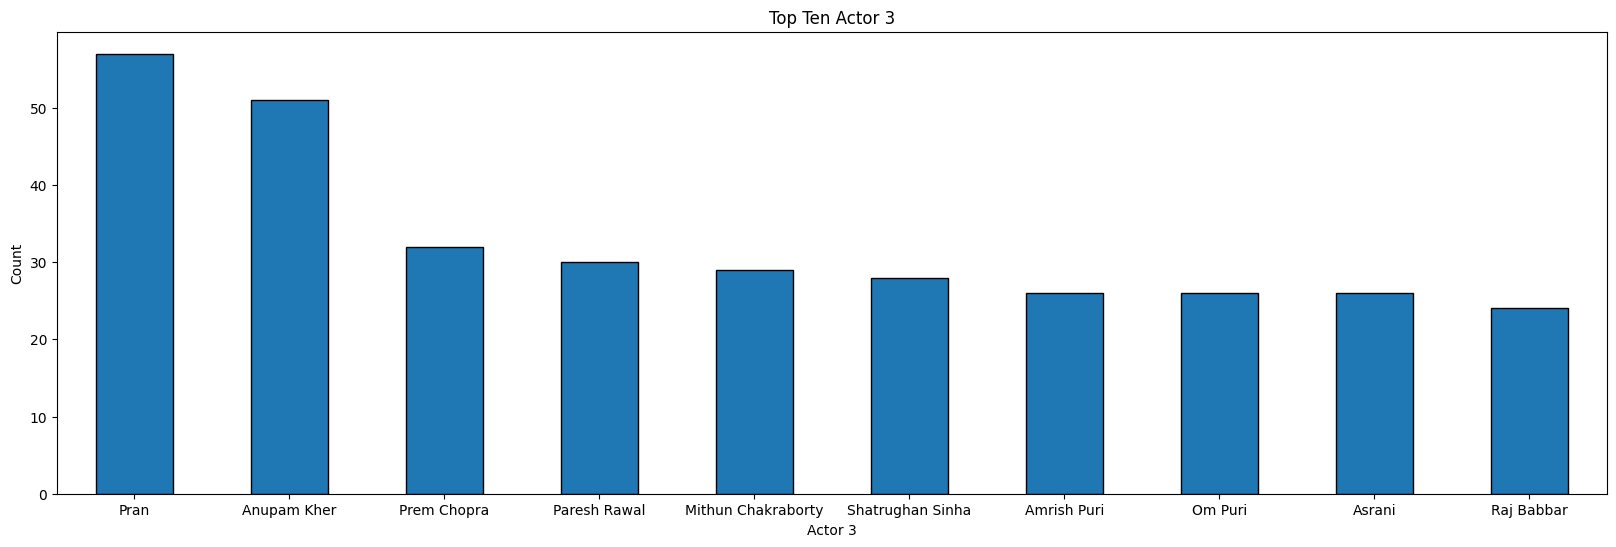

In [23]:
TopTenPlot("Actor 3")

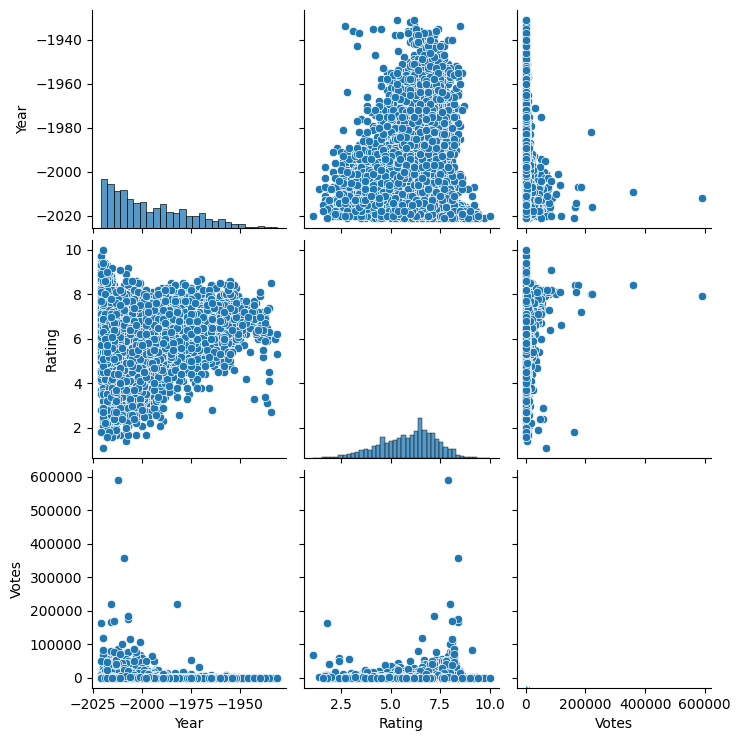

In [24]:
sns.pairplot(df)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr(method='spearman')

Encoding text data into numerical data

In [25]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [26]:
categorical_features = ["Genre","Director","Actor 1","Actor 2","Actor 3"]
for features in categorical_features:
  le = LabelEncoder()
  df[features] = le.fit_transform(df[features])


Defining the features and Target Variable

In [27]:
x = df[["Genre","Director","Actor 1","Actor 2","Actor 3"]]
y = df[["Rating"]]

In [28]:
print(x)

       Genre  Director  Actor 1  Actor 2  Actor 3
0        229       629     1352     2272      319
2        184      1335     1198      719     2148
4        157      1530      378       75     2045
5        289      2044      692     1112     2524
7        320       135     1934     1175     1013
...      ...       ...      ...      ...      ...
15492    229      1223     1861     1801     1615
15493    133      2059      763     1619     1184
15502     28      1793      406      754     1685
15504     38      1025      112     2164      314
15507     38       895      468      753      303

[5659 rows x 5 columns]


In [29]:
print(y)

       Rating
0         7.0
2         4.4
4         4.7
5         7.4
7         5.6
...       ...
15492     6.1
15493     6.2
15502     5.8
15504     4.5
15507     6.2

[5659 rows x 1 columns]


# Data Standardization

In [30]:
std = StandardScaler()


In [31]:
standardized_data = std.fit_transform(x)

In [32]:
x = standardized_data
y = df["Rating"]

In [33]:
print(x)

[[ 0.52931791 -0.84886812  0.6816723   1.63359215 -1.32934107]
 [ 0.11341838  0.17933035  0.40902916 -0.69552904  1.21099562]
 [-0.13612133  0.46332284 -1.04270705 -1.66137196  1.06793675]
 ...
 [-1.32836665  0.84634861 -0.99313557 -0.64303758  0.56792515]
 [-1.23594453 -0.2721449  -1.51363611  1.47161849 -1.33628568]
 [-1.23594453 -0.46147323 -0.88337015 -0.64453734 -1.35156381]]


In [34]:
print(y)

0        7.0
2        4.4
4        4.7
5        7.4
7        5.6
        ... 
15492    6.1
15493    6.2
15502    5.8
15504    4.5
15507    6.2
Name: Rating, Length: 5659, dtype: float64


Splitting the data into training and testing

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [36]:
print(x.shape,x_train.shape,x_test.shape)

(5659, 5) (4527, 5) (1132, 5)


# Model Building and Training

In [37]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [38]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

# Model Evalution

In [41]:
#Accuracy of training data
x_train_prediction = regressor.predict(x_train)
mae = mean_absolute_error(x_train_prediction,y_train)
print("Mean Absolute Error: ",mae)

Mean Absolute Error:  0.38736612231373646


In [42]:
#Accuracy of Testing Data
x_test_prediction = regressor.predict(x_test)
mae = mean_absolute_error(x_test_prediction,y_test)
print("Mean Absolute Error: ",mae)

Mean Absolute Error:  1.0487305653710248


*** Conclusion**

In conclusion, this project provides valuable insights and a predictive model for movie rating prediction. The film industry can benefit from these findings to make data-driven decisions regarding movie production, casting, and marketing. The most influential factors identified are the year of release, the number of votes, and movie duration.
